In [5]:
from kf_book.book_plots import set_figsize, figsize
import matplotlib.pyplot as plt
from kf_book.nonlinear_plots import plot_nonlinear_func
from numpy.random import normal
import numpy as np
from numpy.random import multivariate_normal
from kf_book.nonlinear_plots import plot_monte_carlo_mean

In [2]:
gaussian = (0., 1.)
data = normal(loc = gaussian[0], scale=gaussian[1], size=500000)
def f(x):
    return (np.cos(4*(x/2 + 0.7))) - 1.3 * x

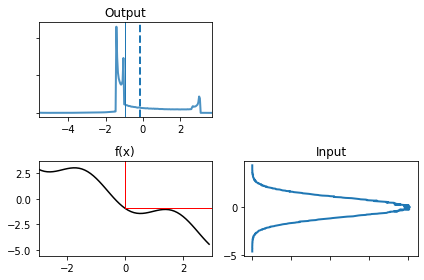

In [3]:
plot_nonlinear_func(data, f)

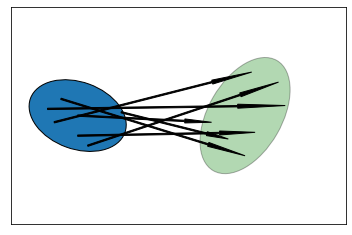

In [4]:
import kf_book.ukf_internal as ukf_internal
ukf_internal.show_2d_transform()

Difference in mean x=0.080, y=43.448


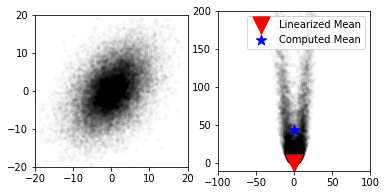

In [7]:
def f_nonlinear_xy(x, y):
    return np.array([x + y, 0.1*x**2 + y*y])

mean = (0.,0.)
P = np.array([[32., 15.],
              [15., 40.]])
mean_fx = f_nonlinear_xy(*mean)

xs, ys = multivariate_normal(mean=mean, cov=P, size=10000).T
plot_monte_carlo_mean(xs, ys, f_nonlinear_xy, mean_fx, "Linearized Mean")

In [8]:
from filterpy.kalman import JulierSigmaPoints

In [9]:
sigmas = JulierSigmaPoints(n=2, kappa=1)

In [10]:
from kf_book.ukf_internal import plot_sigmas

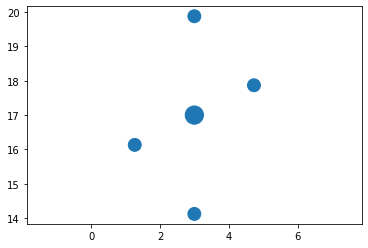

In [11]:
plot_sigmas(sigmas, x=[3, 17], cov=[[1, 0.5], [0.5, 3]])

In [12]:
def fx(x, dt):
    xout = np.empty_like(x)
    xout[0] = x[1] * dt + x[0]
    xout[1] = x[1]
    return xout
def hx(x):
    return x[:1]

In [13]:
from numpy.random import randn
from filterpy.kalman import UnscentedKalmanFilter
from filterpy.common import Q_discrete_white_noise

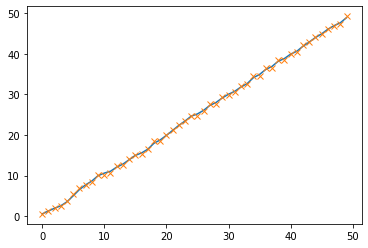

In [14]:
ukf = UnscentedKalmanFilter(dim_x=2, dim_z=1, dt=1., hx=hx, fx=fx, points=sigmas)
ukf.P *= 10
ukf.R *= 0.5
ukf.Q = Q_discrete_white_noise(2, dt=1, var=0.03)
zs, xs = [], []
for i in range(50):
    z = i + randn() * 0.5
    ukf.predict()
    ukf.update(z)
    xs.append(ukf.x[0])
    zs.append(z)
plt.plot(xs)
plt.plot(zs, marker="x", ls="")